In [1]:
%%html
<style>
.prompt_container { display: none !important; }
.prompt { display: none !important; }
.run_this_cell { display: none !important; }


</style>

# ProgRes, Part II

# Crash Course on LLMs

Fabien Mathieu - fabien.mathieu@lip6.fr

Sébastien Tixeuil - Sebastien.Tixeuil@lip6.fr

# Who am I?

- Associate researcher @LIP6 (academic lab)
- Technomage @Swapcard (event company)
- https://balouf.github.io/index.html

# Roadmap

- Part one (low-level communication): done
- Part II: LLMs
  - Why a LLM course?
  - LLM in a nutshell
  - Good practice
  - Case studies
- Part III: Web Service

# Methodology

- Course, practicals, and mini-projects are made on notebooks (jupyter or jupyterlab)
- Available on Github: https://github.com/balouf/progres
- This means you will send your practical notebooks.
- Please put your name(s) on the filename AND inside as well!

# Jupyter Notebook?

A notebook is just a text file with extension `.ipynb` that contains cells.

- Two main types of cells:
  - Markdown cells to write formatted text. You can itemize or write maths like $\frac{\sqrt{\pi}}{2}$.
  - Code cell to execute Python code
- This is a markdown cell

In [2]:
# This is a code cell
x = 1+3

In [3]:
# Cell codes share the same workspace
x

4

# Using Jupyter Notebook

Two modes:

- Command mode (blue). Hit `esc` to enter it
- Edit mode (green). Hit `enter` on a cell to edit
- There are many shortcuts (hit `H` on command mode to see them)

# The rules

https://github.com/balouf/progres/blob/main/rules.ipynb

Following them is mandatory.

# Use of LLMs in the course

- You must indicate the LLM(s) you use and write your prompts.
- We evaluate the driver, not the car.
- LLMs evolve very quickly. Learn to surf the wave!

# Choosing a LLM

- No recommendation on which LLM you should use.
- Remote LLM? Beware of privacy.
- No idea? chatgpt.com is fine. Great feedbacks from notebookLM
- Perplexity, Claude, Grok, Deepsearch, ... no problem.
- You can have one for code, one for humans.
- Local? If you can, OK.

# What you will do in the LLM course

- Understand what LLMs change for work, especially in computer science.

- Have a minimal knowledge of what a Large Language Model (LLM) is.    
    
- Learn good practice when using ChatGPT for professional purpose.
    
- Develop a critic stance w.r.t. LLM's answer.
  

# Disclaimer

The creation of that course was assisted by Perplexity (brainstorm, research).

# Why you should pay attention (for real)

# Students and LLMs

- Before chatGPT, two major ways to cheat in assignments:
  - Stackoverflow
  - Copy from other students
- ChatGPT introduced a third option: instant, brainless cheating!

# Students and LLMs

- Early years: flawed code, huge hallucinations, `As a Language model`...
- Today: It works (most of the time)
  - Reduced hallucinations
  - A style easy to recognize and identify

# Students and LLMs

Example of hallucination from last year:

> Source: python cookbook by David Beazley and Brian Kernighan

Python cookbook was actually written by David Beazley and Brian K. Jones. Brian Kernighan is a big shot in computer science (C, Unix,..) but he never wrote a "Python cookbook", it's just chatGPT mixing up things.

Result: **1/20**

# Students and LLMs

Now, I see roughly three sort of students:
- Don't use LLMs for various reasons
- Use LLMs to cheat and get the answer instantly
- Use LLMs as their assistant to learn and work

My goal: increase the population of the last category

# Will there be a job for you when you graduate?


**A sure thing: LLMs are changing the work landscape. Educated professions are the most impacted.**

# No job for you: traditional *Junior Developer*

- We used to train junior devs by asking them simple tasks
- Good news: chatGPT can do that for you, no need to learn anything!
- Bad news: we have a GPT subscription already. Why should we hire you?
- If copy/paste is your only skill, consider new job perspectives

> If an AI can fix a trivial bug or scaffold a component with minimal human input, why pay a junior to do it instead?

# New job for you: AI-assisted *Junior Developer*

- Like a junior is supervised by a senior, we expect that a junior is able to supervise AI's production.
- You need to master the tools at your disposal to make things work and improve your expertise.
- True copilot master? Do not worry then!

> Junior engineers are expected to contribute in ways that go beyond what an AI can do – things like understanding requirements, verifying correctness, and injecting creativity.

# Important disclaimer

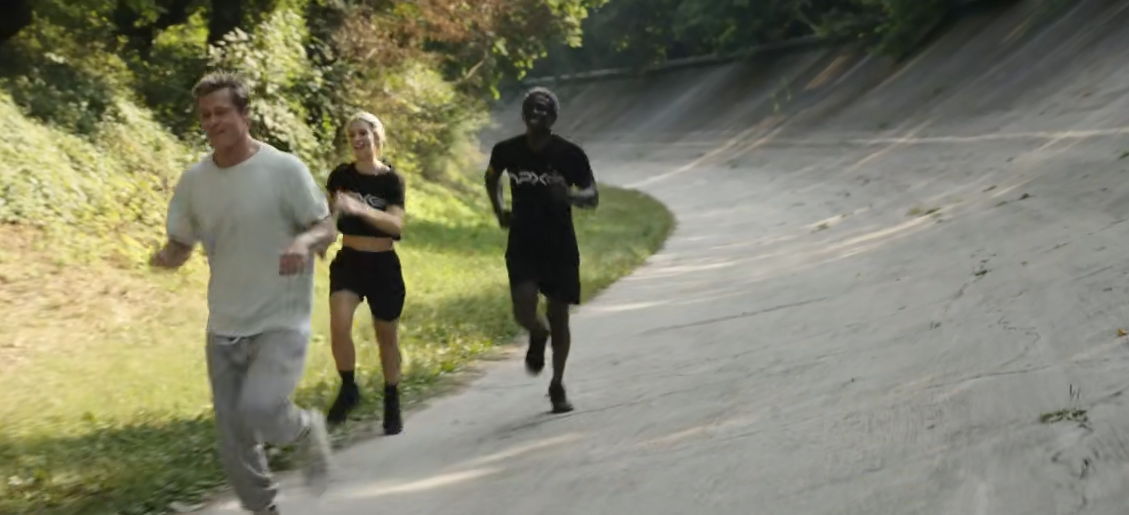
You cannot be a great driver if you cannot run! 

# Some articles (2025-09)

- https://gradientflow.com/the-great-hollowing-out-ai-and-the-junior-role-crisis/
- https://codeconductor.ai/blog/future-of-junior-developers-ai/
- https://addyo.substack.com/p/ai-wont-kill-junior-devs-but-your
- https://arxiv.org/abs/2507.07935
- https://arxiv.org/abs/2303.10130

# What is a LLM?

# What is a LLM?


- It's something that [Passes the Turing test](https://arxiv.org/abs/2503.23674)
- But it's no [magic wand](https://en.wikipedia.org/wiki/Clarke%27s_three_laws)
- Understand what it is to avoid fears and false hopes


# LLMs: physical ingredients

- Data. Lots of data.
- Memory. Lots of memory.
- GPU. Lots of GPU.

# LLMs: logical ingredients

- Neural network: Learn arbitrarily complex function.
- Attention mechanism: Put everything in context.
- Maths: Predict the future from the past.

# Are you a good LLM?

- A, B, C, D, E, ?
- $e=mc^x, x=$?
- King - Man + Woman = ????
- Once upon a time there was a ?????

# Intermezzo: Small and Stupid Language Model (SSML)

# SSLM: physical ingredients

- Data. https://data.assemblee-nationale.fr/travaux-parlementaires/debats
- Specifically: https://data.assemblee-nationale.fr/static/openData/repository/17/vp/syceronbrut/syseron.xml.zip
- Memory. 16GB.
- CPU. One.

# SSLLM: logical ingredients

- Compute next word based on last two words.

# Load packages

In [4]:
import zipfile # Read zip archive
import numpy as np # Do maths
from bs4 import BeautifulSoup as Soup # Parse XML
import unicodedata # Clean strange UTF8 chars
from collections import defaultdict # Smart dicts
from tqdm import tqdm # Wait estimator

# Train function

In [6]:
def train(filename="syseron.xml.zip"):
    futu = defaultdict(lambda: defaultdict(int))
    with zipfile.ZipFile(filename, mode="r") as archive:
        for filename in tqdm(archive.filelist):
            with archive.open(filename, "r") as f:
                res = Soup(f.read().decode('utf8'), "xml")
                for txt in res('texte'):
                    txt = unicodedata.normalize('NFKD', txt.text).strip().split()
                    for i in range(len(txt)-2):
                        futu[(txt[i], txt[i+1])][txt[i+2]] += 1
    futu = dict(futu)
    for k, v in futu.items():
        tot = sum(v.values())
        choi = [k for k in v]
        ws = [w/tot for w in v.values()]
        futu[k] = (choi, ws)
    return futu

# Train

In [7]:
predictor = train()

100%|████████████████████████████████████████████████████████████████████████████████| 283/283 [00:50<00:00,  5.65it/s]


In [8]:
print(f"Number of 2-gramms: {len(predictor)}")
print(f"Number of weigths: {sum(len(v[0]) for v in predictor.values())}")

Number of 2-gramms: 1670156
Number of weigths: 4188273


# Predict function

In [9]:
rng = np.random.default_rng()

def next_c(cursor):
    vs = predictor.get(cursor)
    if vs:
        return str(rng.choice(vs[0], p=vs[1]))

def expand(txt, m=150):
    res = []
    buf = tuple(txt.split()[-2:])
    c = next_c(buf)
    while c and len(res)<m:
        res.append(c)
        buf = (buf[1], c)
        c = next_c(buf)
    print(txt + " " + " ".join(res))

# Playtime

In [16]:
expand("La parole")

La parole est à M. Boris Vallaud applaudissent.) Je vous demande d’abroger cet article. (Applaudissements sur plusieurs bancs du groupe Dem.) La police municipale – y compris en ayant recours à la retraite pour en conserver la possibilité d’une attribution intermédiaire, ne concernant qu’une partie de la commission. Les amendements visent à diminuer le remboursement des consultations de suivi que de simples réminiscences des mouvements de gauche qui contribue à lutter contre le cancer. Arrêtons d’opposer le public éligible, c’est-à-dire les médecins – qui sont commandés. Or le modèle agricole et de confiance entre les établissements de santé mentale, puisqu’un comité de pilotage divers et variés. Mais, au Rassemblement national vient de tomber dans les trains d’équilibre du territoire avec le Parlement. Nous avons terminé les questions posées. Premièrement, il est impensable que la proposition de loi de financement de la sécurité des personnes ayant séjourné da

# LLM vs SSML

- More everything (x$10^6$ or more everywhere)
- Better algorithmic logic (attention, NNs)
- Otherwise... Same principle!

# LLMs: first cons

LLMs and SSLMs have similar flaws (less easy to detect with LLMs)

- Hallucinations, factual errors
- No human-level comprehension

# LLM: Good practice

# The main question: what is your goal?

- Get the answer?
- Learn a new skill?
- Anything in between?

Always try to have that question in mind when using a LLM.

# Get the answer

- Fix an error in your code
- Correct typos and grammatical errors in a CV
- Craft a CSS when you need a web page and have no frotend skill

# Learn a new skill

- Learn Spanish
- Learn ways to accelerate your Python code
- Learn how to write music with Lilypond

# Anything in-between

- Prepare a new course on LLMs
- Write a complex Python class
- Solve exercise 3 in TME2

# Three rules for using a LLM

- Prompt is everything
- Everybody lies    
- Iterate

# Prompt is everything

- A LLM can imitate anyone
- A LLM cannot read your mind
- For simple question (correct an error in your code), a simple prompt is fine
- If you want a complex answer, write an explicit, context-full question

# Prompt is everything

> Explain memoization. ELI5

> Imagine you're solving a really hard puzzle, like finding the 7th number in a special sequence (called Fibonacci). To get that number, you need to know the 6th and 5th numbers first. But oh no, to get the 6th number, you again need the 5th number and the 4th number. So you keep doing the same work over and over...

# Prompt is everything

> You are teaching PhD students in a prestigious CS university. Explain memoization.

> Memoization is a programming optimization technique primarily used to accelerate expensive function calls by caching their results. When a memoized function receives a set of inputs, it stores the result of the computation so that if the function is called again with the same inputs, it immediately returns the cached result instead of recomputing it.

# Prompt is everything

> Explain memoization as if you were a big MAGA fan.

> Memoization is the ultimate winning strategy in programming — a real game changer! It’s like when you’re smart enough to remember the best moves so you never waste your energy doing the same thing twice. No losers here!

# Personal examples

> I am a researcher in computer science. I am writing a response letter for a major revision of an article. I'd like you to check some of my paragraph. I want you to preserve my writing style as much as possible: if there is no typo, no grammar error, no wrong idiomatism, and if the tone is consistent with a response letter, don't change anything. Globally, aim at minimizing the changes you propose. Are you ready?

> I am head of research in a small company and I am writing an article for our technical blog. The target audience is C-level executive interested in our latest product (HBP), with a bit of technical background, and that wants a taste of the product on the tech-side, unpolluted by the marketing.
Your objective is to polish my article while keeping my original tone. I'll give you the Typst source of the article (please preserve the Typst formatting).
Are you ready?

> I use Rise with Jupyter<7 for compatibility. I have issues with the nb-extensions.

> [W 18:14:35.718 NotebookApp] Clearing invalid/expired login cookie username-localhost-8888
> [W 18:14:35.719 NotebookApp] [jupyter_nbextensions_configurator] wrote error: 'Forbidden'...

> Je cherche un dataset de textes en français libre de droit pour préparer un TP d'informatique sur la prédiction. J'aimerais bien quelques Mo de données d'auteurs anciens. L'important est que la ressource soit accessible et facilement téléchargeable.

Note: in the end, I went to opendata France to build the SSLM.

# Prompt tricks

- It's always evolving, don't hard-wire anything!

> Give me prompt engineering tricks like eli5, tldr, jargonify...

https://www.perplexity.ai/search/give-me-prompt-engineering-tri-NUvk4.3YSI.WWkJ9.hYSpw#0

# Everybody lies

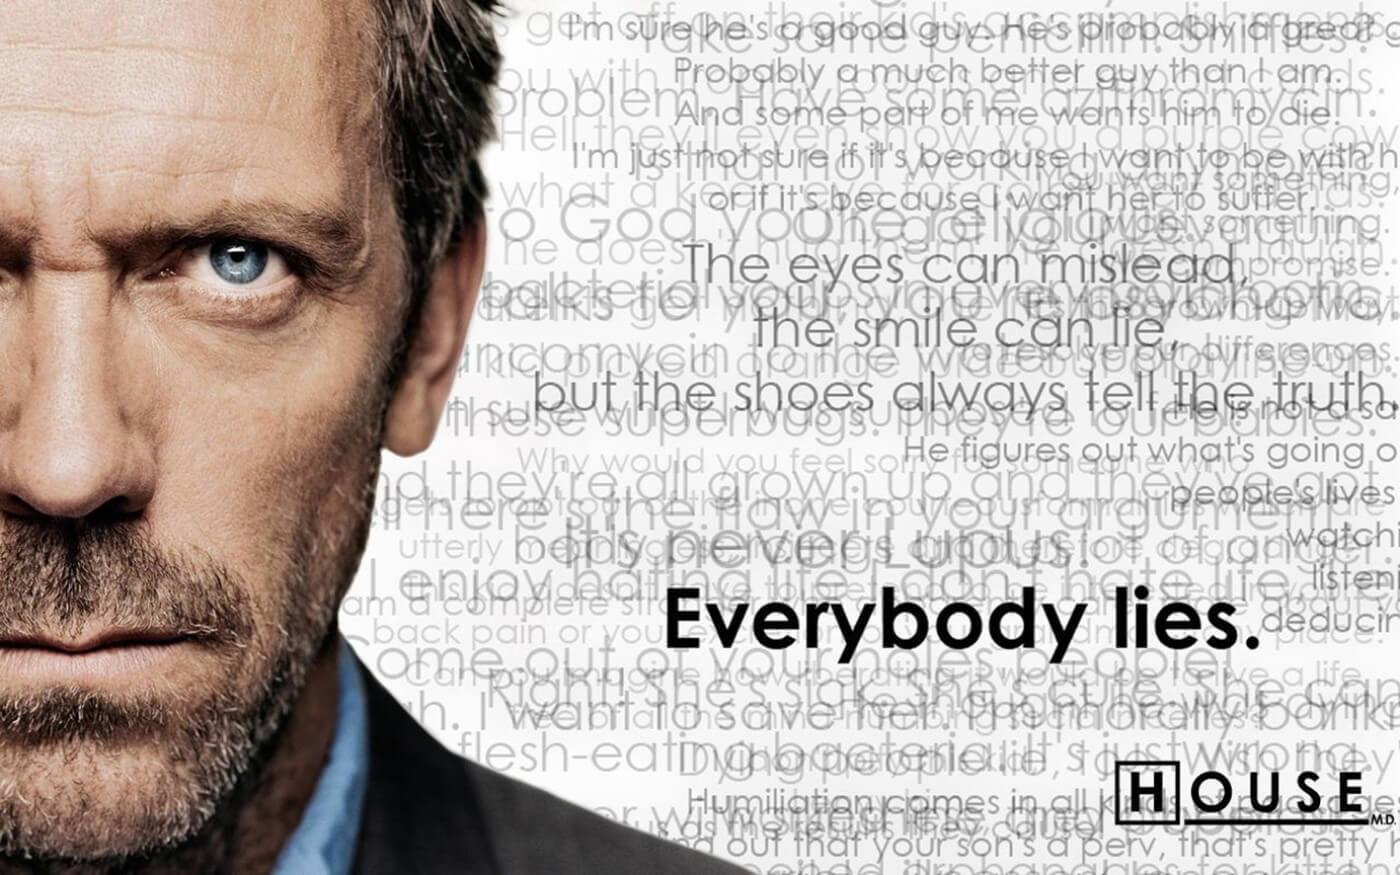

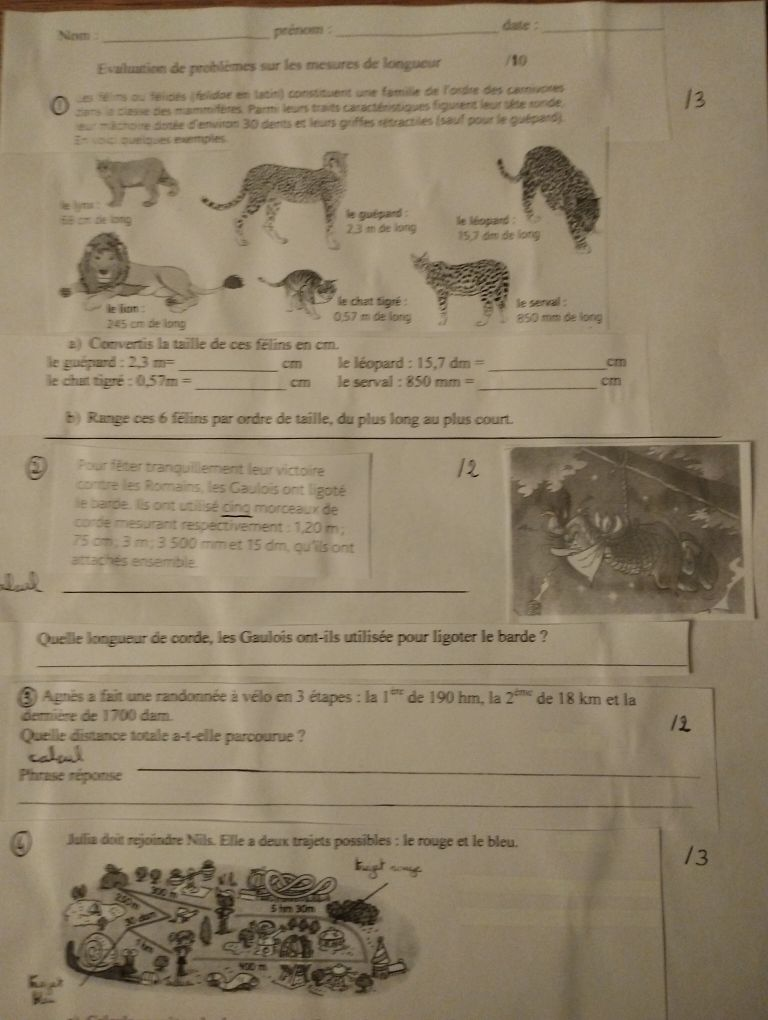

# Q1

Convertis la taille des félins en cm :
- Le guépard : 2,3 m = 230 cm
- Le léopard : 15,7 dm = 157 cm
- Le lion : 2,45 m = 245 cm
- Le chat tigré : 0,57 m = 57 cm
- Le serval : 850 mm = 85 cm

Range ces 6 félins par ordre de taille, du plus long au plus court :

- Le lion (245 cm)
- Le guépard (230 cm)
- Le léopard (157 cm)
- Le serval (85 cm)
- Le chat tigré (57 cm)

# Q2

Additionne les longueurs suivantes, toutes doivent être converties en mètres :
- 1,20 m = 1,20 m
- 75 cm = 0,75 m
- 3,5 m = 3,5 m
- 3 500 mm = 3,5 m
- 15 dm = 1,5 m

Total : 1,20+0,75+3,5+3,5+1,5=10,45 m

Réponse : Les Gaulois ont utilisé une corde de 10,45 m pour ligoter le barde.

# Q3

Additionne les trois étapes après conversion :

- 190 hm = 19 000 m = 19 km
- 18 km
- 1700 dam = 17 000 m = 17 km

Total : 19+18+17=54 km

Réponse : Agnès a parcouru une distance totale de 54 km.

# Q4

Analyser les trajets en fonction du schéma (difficile à préciser sans image nette, mais le principe est de comparer les deux trajets en additionnant les distances indiquées et choisir le plus court).

Additionne les distances du trajet rouge et du trajet bleu, puis indique lequel est le plus court

# Total score: 7/20

# Iterate

- Reformulate when you see the answer is not adapted
- Ask for clarifications if you do not understand
- When the LLM is wrong/lie to your face, confront it, it may work
- It's a dialogue!

https://www.perplexity.ai/search/je-suis-ingenieur-dans-le-priv-zIzipGqZTXmRomGI_Klalw#5

(I discarded most of it because I had many ideas on my own)

https://www.perplexity.ai/search/en-lilypond-j-ai-une-erreur-su-tnxEr9IDQGmILFihMYPviQ#3

(in the end, I understood the way `lyricsto` worked and made my own solution)

https://www.perplexity.ai/search/i-am-head-of-research-in-a-sma-RhQZ4G8TQq.HCMbEsCmpuQ#0

(worked well)

# Tip: threads

LLMs conversation are grouped by threads

- Each thread has the same context
- Avoid mixing different things in the same thread
- Large threads behave strangely sometimes. Restart fresh!

# A too long thread

https://www.perplexity.ai/search/je-cherche-a-transcrire-carmin-N6FGrfMcRJyds7QPTeJH1Q#27

# Questions / Discussion

- You have the floor!